<a href="https://colab.research.google.com/github/natjak/data-science-bootcamp/blob/main/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)


 







### <a name='a1'></a> Import Bibliotek

In [1]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.21.6
Pandas: 1.3.5


### <a name='a2'></a> Załadowanie danych

In [2]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2022-06-02 to 2017-06-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1259 non-null   float64
 1   High    1259 non-null   float64
 2   Low     1259 non-null   float64
 3   Close   1259 non-null   float64
 4   Volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


### <a name='a3'></a> Eksploracja danych

In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-02,2433.68,2512.2000,2400.900,2510.22,5028034
2022-06-01,2445.12,2503.5800,2412.445,2433.68,6376449
2022-05-31,2325.60,2439.8899,2313.500,2404.19,7231708
2022-05-27,2271.00,2303.7400,2252.560,2302.93,4683008
2022-05-26,2159.40,2253.3099,2149.070,2221.55,4650130
...,...,...,...,...,...
2017-06-09,1012.50,1012.9900,927.000,978.31,7636831
2017-06-08,1012.06,1013.6100,1006.110,1010.27,2757185
2017-06-07,1005.95,1010.2500,1002.000,1010.07,2818948


In [4]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-02,2433.68,2512.2000,2400.900,2510.22,5028034
2022-06-01,2445.12,2503.5800,2412.445,2433.68,6376449
2022-05-31,2325.60,2439.8899,2313.500,2404.19,7231708
2022-05-27,2271.00,2303.7400,2252.560,2302.93,4683008
2022-05-26,2159.40,2253.3099,2149.070,2221.55,4650130


In [5]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-02,2433.68,2512.2000,2400.900,2510.22,5028034
2022-06-01,2445.12,2503.5800,2412.445,2433.68,6376449
2022-05-31,2325.60,2439.8899,2313.500,2404.19,7231708


In [6]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-09,1012.50,1012.99,927.00,978.31,7636831
2017-06-08,1012.06,1013.61,1006.11,1010.27,2757185
2017-06-07,1005.95,1010.25,1002.00,1010.07,2818948
2017-06-06,1012.00,1016.50,1001.25,1003.00,3343677
2017-06-05,1007.23,1013.21,1003.51,1011.34,2717402


In [7]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-16,996.00,999.75,982.00,987.71,11439817
2017-06-15,958.70,965.73,950.86,964.17,5237394
2017-06-14,988.59,990.34,966.71,976.47,3968528
2017-06-13,977.99,984.50,966.10,980.79,4571119
2017-06-12,967.00,975.95,945.00,964.91,9437694
2017-06-09,1012.50,1012.99,927.00,978.31,7636831
2017-06-08,1012.06,1013.61,1006.11,1010.27,2757185
2017-06-07,1005.95,1010.25,1002.00,1010.07,2818948
2017-06-06,1012.00,1016.50,1001.25,1003.00,3343677


In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
df.columns = [col.lower() for col in df.columns] #zmieniamy litery na małe
df.head()

,open,high,low,close,volume
Date,,,,,
2022-06-02,2433.68,2512.2000,2400.900,2510.22,5028034
2022-06-01,2445.12,2503.5800,2412.445,2433.68,6376449
2022-05-31,2325.60,2439.8899,2313.500,2404.19,7231708
2022-05-27,2271.00,2303.7400,2252.560,2302.93,4683008
2022-05-26,2159.40,2253.3099,2149.070,2221.55,4650130


In [ ]:
df.describe()

,open,high,low,close,volume
count,2502.000000,2502.000000,2502.000000,2502.000000,2.501000e+03
mean,670.108393,676.485460,662.662974,669.916609,4.476071e+06
std,576.403515,581.245234,570.158425,575.910945,2.862405e+06
min,105.930000,111.290000,105.800000,108.610000,9.864350e+05
25%,226.500000,230.305000,224.120000,226.902500,2.723804e+06
50%,373.930000,377.780000,371.305000,374.165000,3.745599e+06
75%,961.497500,969.897500,955.107500,964.530000,5.282048e+06
max,2038.110000,2050.500000,2013.000000,2039.510000,4.239664e+07


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,2502.0,6.701084e+02,5.764035e+02,105.93,2.265000e+02,373.930,9.614975e+02,2038.11
high,2502.0,6.764855e+02,5.812452e+02,111.29,2.303050e+02,377.780,9.698975e+02,2050.50
low,2502.0,6.626630e+02,5.701584e+02,105.80,2.241200e+02,371.305,9.551075e+02,2013.00
close,2502.0,6.699166e+02,5.759109e+02,108.61,2.269025e+02,374.165,9.645300e+02,2039.51
volume,2501.0,4.476071e+06,2.862405e+06,986435.00,2.723804e+06,3745599.000,5.282048e+06,42396643.00


### <a name='a4'></a> Selekcja kolumn

In [ ]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644.0
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489.0
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979.0
2019-12-05,1763.50,1763.50,1740.00,1740.48,2827852.0
2019-12-04,1774.01,1789.09,1760.22,1760.69,2680700.0
2019-12-03,1760.00,1772.87,1747.23,1769.96,3529582.0
2019-12-02,1804.40,1805.55,1762.68,1781.60,3931750.0
2019-11-29,1817.78,1824.69,1800.79,1800.80,1923440.0
2019-11-27,1801.00,1824.50,1797.31,1818.51,3023355.0


In [ ]:
df['open']

Date
2019-12-10    1747.40
2019-12-09    1750.66
2019-12-06    1751.20
2019-12-05    1763.50
2019-12-04    1774.01
2019-12-03    1760.00
2019-12-02    1804.40
2019-11-29    1817.78
2019-11-27    1801.00
2019-11-26    1779.92
Name: open, dtype: float64

In [ ]:
df.open

Date
2019-12-10    1747.40
2019-12-09    1750.66
2019-12-06    1751.20
2019-12-05    1763.50
2019-12-04    1774.01
2019-12-03    1760.00
2019-12-02    1804.40
2019-11-29    1817.78
2019-11-27    1801.00
2019-11-26    1779.92
Name: open, dtype: float64

In [ ]:
df[['open']]

,open
Date,
2019-12-10,1747.40
2019-12-09,1750.66
2019-12-06,1751.20
2019-12-05,1763.50
2019-12-04,1774.01
2019-12-03,1760.00
2019-12-02,1804.40
2019-11-29,1817.78
2019-11-27,1801.00


In [ ]:
df[['open', 'close']]

,open,close
Date,,
2019-12-10,1747.40,1739.21
2019-12-09,1750.66,1749.42
2019-12-06,1751.20,1751.60
2019-12-05,1763.50,1740.48
2019-12-04,1774.01,1760.69
2019-12-03,1760.00,1769.96
2019-12-02,1804.40,1781.60
2019-11-29,1817.78,1800.80
2019-11-27,1801.00,1818.51


In [ ]:
df.iloc[:, 0]

Date
2019-12-10    1747.40
2019-12-09    1750.66
2019-12-06    1751.20
2019-12-05    1763.50
2019-12-04    1774.01
2019-12-03    1760.00
2019-12-02    1804.40
2019-11-29    1817.78
2019-11-27    1801.00
2019-11-26    1779.92
Name: open, dtype: float64

In [ ]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2019-12-10,1747.40,1739.21
2019-12-09,1750.66,1749.42
2019-12-06,1751.20,1751.60
2019-12-05,1763.50,1740.48
2019-12-04,1774.01,1760.69
2019-12-03,1760.00,1769.96
2019-12-02,1804.40,1781.60
2019-11-29,1817.78,1800.80
2019-11-27,1801.00,1818.51


In [ ]:
df.iloc[:, 3:5]

,close,volume
Date,,
2019-12-10,1739.21,2515644.0
2019-12-09,1749.42,2502489.0
2019-12-06,1751.60,3119979.0
2019-12-05,1740.48,2827852.0
2019-12-04,1760.69,2680700.0
2019-12-03,1769.96,3529582.0
2019-12-02,1781.60,3931750.0
2019-11-29,1800.80,1923440.0
2019-11-27,1818.51,3023355.0


In [ ]:
df.iloc[:, -1]

Date
2019-12-10    2515644.0
2019-12-09    2502489.0
2019-12-06    3119979.0
2019-12-05    2827852.0
2019-12-04    2680700.0
2019-12-03    3529582.0
2019-12-02    3931750.0
2019-11-29    1923440.0
2019-11-27    3023355.0
2019-11-26    3190428.0
Name: volume, dtype: float64

In [ ]:
df.iloc[:, [-1]]

,volume
Date,
2019-12-10,2515644.0
2019-12-09,2502489.0
2019-12-06,3119979.0
2019-12-05,2827852.0
2019-12-04,2680700.0
2019-12-03,3529582.0
2019-12-02,3931750.0
2019-11-29,1923440.0
2019-11-27,3023355.0


In [ ]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2019-12-10,1735.00,1739.21,2515644.0
2019-12-09,1745.61,1749.42,2502489.0
2019-12-06,1740.13,1751.60,3119979.0
2019-12-05,1740.00,1740.48,2827852.0
2019-12-04,1760.22,1760.69,2680700.0
2019-12-03,1747.23,1769.96,3529582.0
2019-12-02,1762.68,1781.60,3931750.0
2019-11-29,1800.79,1800.80,1923440.0
2019-11-27,1797.31,1818.51,3023355.0


### <a name='a5'></a>  Selekcja wierszy

In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644.0
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489.0
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979.0
2019-12-05,1763.50,1763.50,1740.00,1740.48,2827852.0
2019-12-04,1774.01,1789.09,1760.22,1760.69,2680700.0
2019-12-03,1760.00,1772.87,1747.23,1769.96,3529582.0
2019-12-02,1804.40,1805.55,1762.68,1781.60,3931750.0
2019-11-29,1817.78,1824.69,1800.79,1800.80,1923440.0
2019-11-27,1801.00,1824.50,1797.31,1818.51,3023355.0


In [ ]:
df.iloc[0]

open         1747.40
high         1750.67
low          1735.00
close        1739.21
volume    2515644.00
Name: 2019-12-10 00:00:00, dtype: float64

In [ ]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644.0
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489.0
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979.0


In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644.0
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489.0
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979.0
2019-12-05,1763.50,1763.50,1740.00,1740.48,2827852.0
2019-12-04,1774.01,1789.09,1760.22,1760.69,2680700.0
2019-12-03,1760.00,1772.87,1747.23,1769.96,3529582.0
2019-12-02,1804.40,1805.55,1762.68,1781.60,3931750.0
2019-11-29,1817.78,1824.69,1800.79,1800.80,1923440.0
2019-11-27,1801.00,1824.50,1797.31,1818.51,3023355.0


In [ ]:
df.loc['2019-12-10': '2019-12-02']

,open,high,low,close,volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644.0
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489.0
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979.0
2019-12-05,1763.50,1763.50,1740.00,1740.48,2827852.0
2019-12-04,1774.01,1789.09,1760.22,1760.69,2680700.0
2019-12-03,1760.00,1772.87,1747.23,1769.96,3529582.0
2019-12-02,1804.40,1805.55,1762.68,1781.60,3931750.0


### <a name='a6'></a> Obliczanie nowych kolumn

In [10]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 773 entries, 2022-06-02 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    773 non-null    float64
 1   High    773 non-null    float64
 2   Low     773 non-null    float64
 3   Close   773 non-null    float64
 4   Volume  773 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 36.2 KB


In [11]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-02,23.07,24.83,22.940,24.74,30691100
2022-06-01,23.53,23.87,22.565,22.94,26383612
2022-05-31,23.50,23.90,23.034,23.20,33194791
2022-05-27,23.49,24.13,23.330,23.67,29710163
2022-05-26,22.15,23.28,21.925,23.10,30199398


In [12]:
df.describe()

,Open,High,Low,Close,Volume
count,773.000000,773.000000,773.000000,773.000000,7.730000e+02
mean,39.483342,40.273685,38.579782,39.418254,2.534624e+07
std,9.375582,9.435081,9.262789,9.331355,1.709189e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,32.340000,33.020000,31.420000,32.420000,1.492647e+07
50%,37.560000,38.520000,36.800000,37.400000,2.136595e+07
75%,45.915000,47.000000,45.080000,45.980000,3.107645e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [13]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-02,23.07,24.83,22.940,24.74,30691100
2022-06-01,23.53,23.87,22.565,22.94,26383612
2022-05-31,23.50,23.90,23.034,23.20,33194791


In [14]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2022-06-02,23.07,24.83,22.940,24.74,30691100,23.905
2022-06-01,23.53,23.87,22.565,22.94,26383612,23.235
2022-05-31,23.50,23.90,23.034,23.20,33194791,23.350
2022-05-27,23.49,24.13,23.330,23.67,29710163,23.580
2022-05-26,22.15,23.28,21.925,23.10,30199398,22.625


In [15]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [16]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [17]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [18]:
del df['Close_shift']

In [19]:
df.head()

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,0.041414


In [20]:
df.Daily_Change.min()

-0.21628767847699626

In [21]:
df.Daily_Change.max()

0.3825910931174088

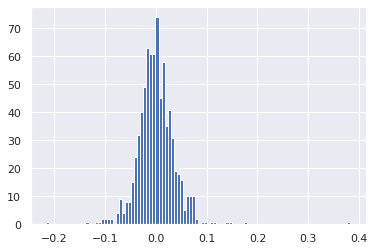

In [23]:
#import seaborn as sns
#sns.set()

df.Daily_Change.hist(bins=100) #bins = liczba słupków, które chcemy na histogramie

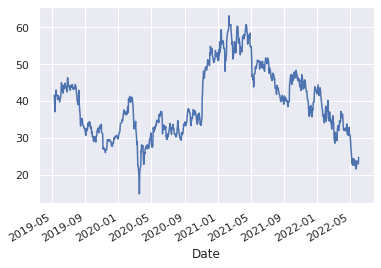

In [24]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [25]:
df

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2019-05-10,42.00,45.00,41.060,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.080,37.10,79442420,37.945,-0.107529
2019-05-14,38.31,39.96,36.850,39.96,46661147,39.135,0.077089
2019-05-15,39.37,41.88,38.950,41.29,36086065,40.330,0.033283
2019-05-16,41.48,44.06,41.250,43.00,38115524,42.240,0.041414
...,...,...,...,...,...,...,...
2022-05-26,22.15,23.28,21.925,23.10,30199398,22.625,0.048094
2022-05-27,23.49,24.13,23.330,23.67,29710163,23.580,0.024675
2022-05-31,23.50,23.90,23.034,23.20,33194791,23.350,-0.019856


In [26]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,0.077089
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,0.033283
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,0.041414
2019-05-24,41.28,41.510,40.500,41.51,8786751,41.395,0.025698
2019-05-31,41.15,41.570,39.410,40.41,23209848,40.780,0.015327
...,...,...,...,...,...,...,...
2022-05-23,23.32,23.830,22.710,23.78,35204796,23.550,0.018415
2022-05-25,21.71,22.355,21.275,22.04,31270767,21.875,0.022738
2022-05-26,22.15,23.280,21.925,23.10,30199398,22.625,0.048094


In [27]:
df_positive.Daily_Change.mean()

0.027580121448392197

In [28]:
 df_negative = df[df.Daily_Change < 0]
 df_negative

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,-0.107529
2019-05-17,41.98,43.2900,41.270,41.91,20225687,41.945,-0.025349
2019-05-20,41.19,41.6800,39.460,41.59,29222330,41.390,-0.007635
2019-05-21,42.00,42.2400,41.250,41.50,10802851,41.750,-0.002164
2019-05-22,41.05,41.2800,40.500,41.25,9089469,41.150,-0.006024
...,...,...,...,...,...,...,...
2022-05-16,24.27,24.4600,23.400,23.59,27285196,23.930,-0.032800
2022-05-18,23.98,24.1882,22.340,22.46,35747320,23.220,-0.071901
2022-05-24,23.69,23.7400,21.410,21.55,40726064,22.620,-0.093776


In [29]:
 df_negative.Daily_Change.mean()

-0.025192664497039517

In [30]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2022-05-26    False
2022-05-27    False
2022-05-31    False
2022-06-01    False
2022-06-02    False
Length: 773, dtype: bool

In [31]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,0.012780


In [32]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,-0.017112


In [34]:
df.index > '2022-05-01'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [35]:
df[df.index > '2022-05-01']

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2022-05-02,31.24,31.3500,29.510,30.39,45650984,30.815,-0.034625
2022-05-03,30.15,30.5900,28.850,29.47,58340743,29.810,-0.030273
2022-05-04,27.41,28.4000,25.900,28.10,115601799,27.755,-0.046488
2022-05-05,27.87,28.8300,26.200,26.83,52804190,27.350,-0.045196
2022-05-06,26.84,26.8400,24.750,26.07,56575091,26.455,-0.028327
2022-05-09,25.41,26.0650,22.800,23.05,58095902,24.230,-0.115842
2022-05-10,23.85,24.5500,22.800,23.67,47982539,23.760,0.026898
2022-05-11,23.28,24.1500,22.500,22.57,51137731,22.925,-0.046472
2022-05-12,22.15,24.0600,21.690,23.29,63999349,22.720,0.031901


In [36]:
df[(df.index >= '2022-05-01') & (df.index < '2022-05-30')]

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2022-05-02,31.24,31.3500,29.510,30.39,45650984,30.815,-0.034625
2022-05-03,30.15,30.5900,28.850,29.47,58340743,29.810,-0.030273
2022-05-04,27.41,28.4000,25.900,28.10,115601799,27.755,-0.046488
2022-05-05,27.87,28.8300,26.200,26.83,52804190,27.350,-0.045196
2022-05-06,26.84,26.8400,24.750,26.07,56575091,26.455,-0.028327
2022-05-09,25.41,26.0650,22.800,23.05,58095902,24.230,-0.115842
2022-05-10,23.85,24.5500,22.800,23.67,47982539,23.760,0.026898
2022-05-11,23.28,24.1500,22.500,22.57,51137731,22.925,-0.046472
2022-05-12,22.15,24.0600,21.690,23.29,63999349,22.720,0.031901


In [40]:
df[(df.index == '2022-05-02') | (df.index == '2022-06-02')]

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2022-05-02,31.24,31.35,29.51,30.39,45650984,30.815,-0.034625
2022-06-02,23.07,24.83,22.94,24.74,30691100,23.905,0.078466


In [41]:
df

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2019-05-10,42.00,45.00,41.060,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.080,37.10,79442420,37.945,-0.107529
2019-05-14,38.31,39.96,36.850,39.96,46661147,39.135,0.077089
2019-05-15,39.37,41.88,38.950,41.29,36086065,40.330,0.033283
2019-05-16,41.48,44.06,41.250,43.00,38115524,42.240,0.041414
...,...,...,...,...,...,...,...
2022-05-26,22.15,23.28,21.925,23.10,30199398,22.625,0.048094
2022-05-27,23.49,24.13,23.330,23.67,29710163,23.580,0.024675
2022-05-31,23.50,23.90,23.034,23.20,33194791,23.350,-0.019856


In [42]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945,-0.107529
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,0.077089
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,0.033283
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,0.041414
...,...,...,...,...,...,...,...
2022-05-24,23.69,23.740,21.410,21.55,40726064,22.620,-0.093776
2022-05-25,21.71,22.355,21.275,22.04,31270767,21.875,0.022738
2022-05-26,22.15,23.280,21.925,23.10,30199398,22.625,0.048094


In [43]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Daily_Change
Date,,,,,,,
2019-07-01,46.980,47.0400,44.0600,44.27,17739998,45.6250,-0.045494
2019-08-01,42.140,42.5355,41.0000,41.31,7349740,41.7250,-0.019696
2019-10-01,30.370,30.5100,28.6500,29.15,13448055,29.7600,-0.043321
2019-11-01,31.450,31.7000,30.7412,31.37,10460430,31.4100,-0.004127
2020-04-01,26.500,26.7670,24.8101,25.42,38538381,25.9600,-0.089542
2020-05-01,29.130,29.7200,28.3250,28.39,19290192,28.7600,-0.062108
2020-06-01,35.640,36.3900,35.1600,35.82,21893806,35.7300,-0.013767
2020-07-01,30.960,31.2650,30.1622,30.43,13611544,30.6950,-0.020914
2020-09-01,33.450,34.5100,33.1450,34.30,16026170,33.8750,0.019923
